<IPython.core.display.Javascript object>


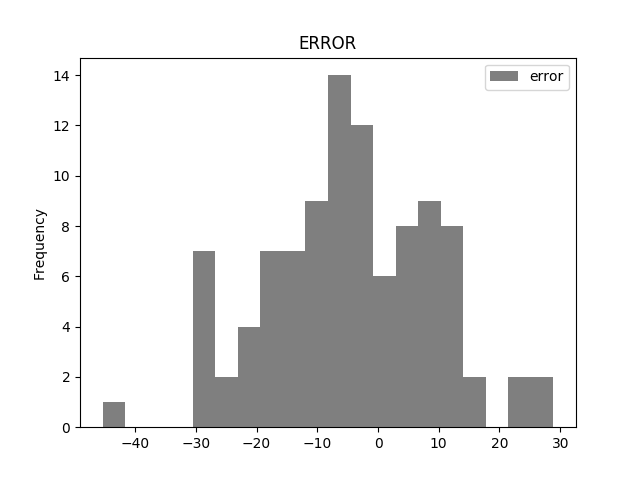

The order is: 4*x+-80


<IPython.core.display.Javascript object>


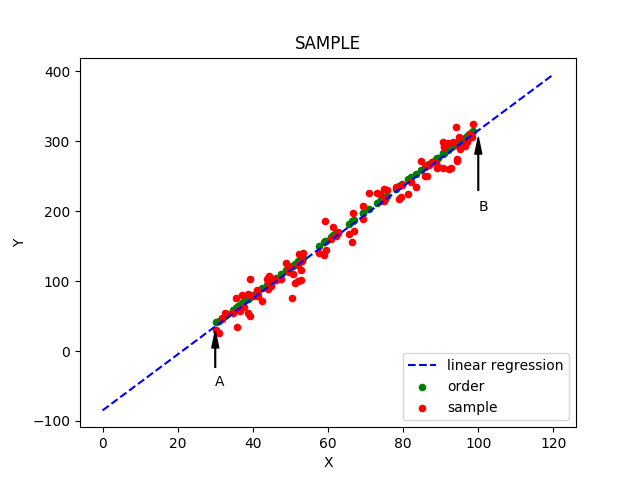

Predicted Theta by minimizing MSE(Mean Square Error):
 [[-84.85759985]
 [  4.00420643]]
Linear Regression Model Coefs:
 4.004206430388156 -84.85759985185416
The score is:  0.9753591300875675


In [13]:
#imports and prepares
import numpy as np
import matplotlib.pyplot as plt
# magic command
%matplotlib notebook
plt.close('all')
import pandas as pd
import sklearn.linear_model

# size of sample
n = 100

mu = 0
sigma = 15
# error belongs to N(mu,sigma^2)
error =mu+sigma*np.random.randn(n)
# show error distribution in hist
de = pd.DataFrame({'error':error},columns=['error'])
de.plot.hist(alpha= 0.5,bins =20,color = 'k',title = "ERROR")
plt.show()

# to save randomizer
# np.random.seed(33)
a=30
b=100
# linear sample on [a;b]
x = a+np.random.rand(n)*(b-a)
k = 4
c= -80
print("The order is: "+str(k)+"*x+"+str(c))
y = k*x+c
df = pd.DataFrame(data = {'Y':y,'X':x}, columns = ['Y','X'])
lin_x = df.plot.scatter(x='X',y='Y',title = "ORDER",color = "green",label = "order")

# linear sample with error

z=y+error
dfn = pd.DataFrame(data = {'Y':z,'X':x}, columns = ['Y','X'])
dfn.plot.scatter(x='X',y='Y',title = "SAMPLE",color = "red",label = "sample", ax = lin_x)
# plt.axis([0,100,0,500])


# theta_predict = (X^T*X)^(-1)*X^T*Y
X = np.array(x).reshape((n,1))
Y = np.array(z).reshape((n,1))
Xb = np.c_[np.ones((n,1)),X]
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(Y)
print("Predicted Theta by minimizing MSE(Mean Square Error):\n",theta)

# linear model
model = sklearn.linear_model.LinearRegression()
# train the model
model.fit(X, Y)

print("Linear Regression Model Coefs:\n",model.coef_[0][0],model.intercept_[0])
print("The score is: ",model.score(X,Y))
A = np.linspace(0,120,120)
plt.plot(A, model.intercept_[0] + model.coef_[0][0] * A,"b--",label = "linear regression")
plt.legend(loc="lower right")

# annotation
text_annot = {
    'A':(a,-50),
    'B':(b,200)
}

for annot_label,pos in text_annot.items():
    posX,posY = pos[0],model.predict([[pos[0]]])
    plt.annotate(annot_label,(posX,posY),pos,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))

plt.show()